In [142]:
n=7 #no.of qubits

This project implements random number generator using any number of qubits using effect of quantum interference.
Basic algorithm is:-
Initiate a quantum circuit of n  qubits
Apply an oracle to all qubits.
Oracle does following:--
Generates random bit,0 or 1.
If the random bit is 0,it applies two hadamard gates in succession to input qubit(which is in |0> state initially),so due to constructive and destructive interference effect,we get initial qubit state.
If the random bit is 0,it applies X gate (i.e.bit flip gate)followed by two hadamard gates in succession to input qubit(which is in |0> state initially),so due to constructive and destructive interference effect,they cancel out and we get flipped qubit state. 
Measure  all qubits and print the bit pattern generated by this process after running circuit in qasm simulator mode.
Challenge faced was how to use interference created using hadamard gates to generate a bit pattern.So it was decided to implement the algorithm in the above way.
Implications of this projectc are it could be extended to any number of qubits to generate 
a random bit pattern which as per https://www.jrussellhuffman.com/joyvazirani/ could be extended to create beautiful visualizations and it could be used in wireless domain to test entire transmitter and receiver encoding and decoding chain considering AWGN noise and channel effects by generating random input data corresponding to given Transport block size.

In [143]:
from random import getrandbits

In [144]:
def random_interf_oracle(qbit_idx,qc):
    if (getrandbits(1)==0):  
        qc.h(qbit_idx)
        qc.h(qbit_idx)
        qc.barrier()
    else: 
        qc.x(qbit_idx)
        qc.barrier()
        qc.h(qbit_idx)
        qc.h(qbit_idx)
        qc.barrier()

In [145]:
from qiskit import *
from qiskit import Aer
# Create a Quantum Circuit acting on a single qubit
circ = QuantumCircuit(n,n)
for i in range(n):
    random_interf_oracle(i,circ)
    #measurement
    circ.measure(i,i)


Below is the output of executing the circuit 1000 times.


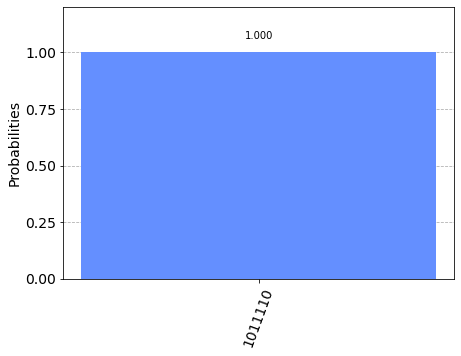

In [146]:
# Import Aer and execute
from qiskit import Aer, execute
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1000)
sim_result = sim.result()
counts = sim_result.get_counts(circ)

print('==================================')
print('\nBelow is the output of executing the circuit 1000 times.')

# We can plot the outcomes stored in the variable 'counts' using the following code:
from qiskit.visualization import plot_histogram
plot_histogram(counts)